In [2]:
import os
import pandas as pd

In [5]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


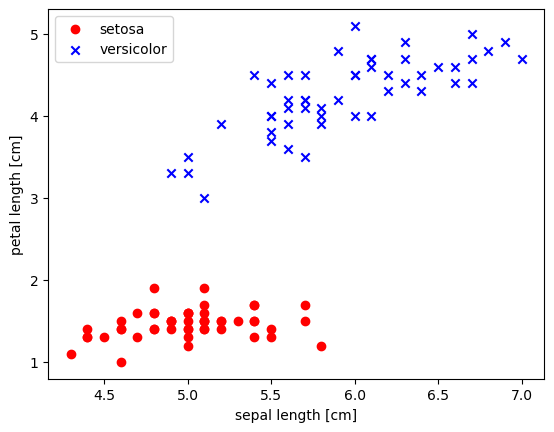

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


In [6]:
import numpy as np


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

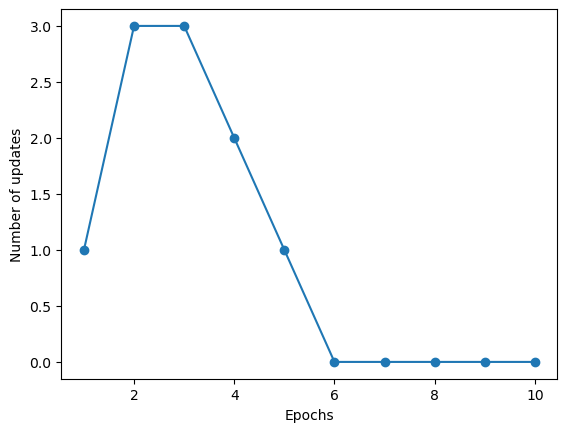

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

C:\Users\semio\AppData\Local\Temp\ipykernel_4928\1692030902.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


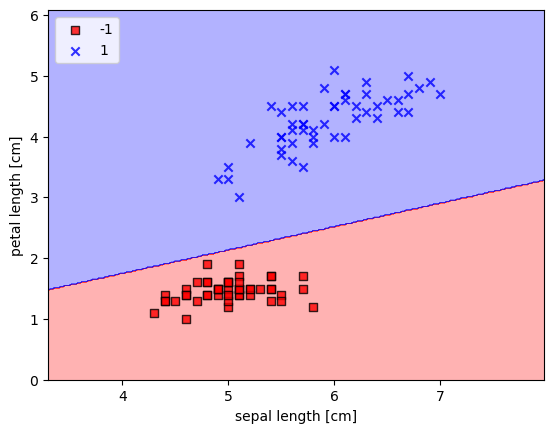

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

Средняя ошибка за эпоху: 0.5097692262073463
Средняя ошибка за эпоху: 0.34462945201633033
Средняя ошибка за эпоху: 0.2357281926722217
Средняя ошибка за эпоху: 0.1638559493990223
Средняя ошибка за эпоху: 0.11642197678719497
Средняя ошибка за эпоху: 0.0851166820688014
Средняя ошибка за эпоху: 0.06445593148344735
Средняя ошибка за эпоху: 0.05082032707243373
Средняя ошибка за эпоху: 0.04182115219320861
Средняя ошибка за эпоху: 0.035881910626368786
Средняя ошибка за эпоху: 0.031962152330448766
Средняя ошибка за эпоху: 0.029375205002995793
Средняя ошибка за эпоху: 0.02766788124224707
Средняя ошибка за эпоху: 0.026541088132436417
Средняя ошибка за эпоху: 0.02579743145670434


C:\Users\semio\AppData\Local\Temp\ipykernel_4928\1692030902.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


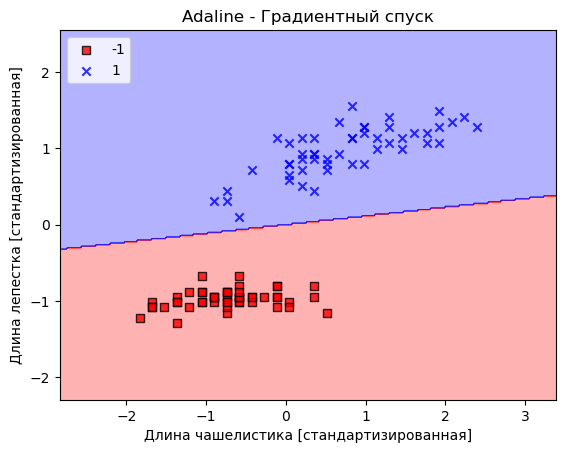

In [11]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta 
        self.n_iter = n_iter 
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0 
            self.cost_.append(cost)
            print(f"Средняя ошибка за эпоху: {cost / len(y)}") 
        return self

    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Градиентный спуск')
plt.xlabel('Длина чашелистика [стандартизированная]')
plt.ylabel('Длина лепестка [стандартизированная]')
plt.legend(loc='upper left')
plt.show()


Средняя ошибка за эпоху: 0.20394456166031524
Средняя ошибка за эпоху: 0.07361591599497305
Средняя ошибка за эпоху: 0.05595915980120137
Средняя ошибка за эпоху: 0.04616048513652026
Средняя ошибка за эпоху: 0.039384514777334234
Средняя ошибка за эпоху: 0.03477977825838303
Средняя ошибка за эпоху: 0.031657219041863846
Средняя ошибка за эпоху: 0.029612965517701775
Средняя ошибка за эпоху: 0.02811985114187205
Средняя ошибка за эпоху: 0.027075165024754613
Средняя ошибка за эпоху: 0.026343115030327827
Средняя ошибка за эпоху: 0.025908993480534156
Средняя ошибка за эпоху: 0.025690816663739707
Средняя ошибка за эпоху: 0.02538817994203507
Средняя ошибка за эпоху: 0.025269618641442095


C:\Users\semio\AppData\Local\Temp\ipykernel_4928\1692030902.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


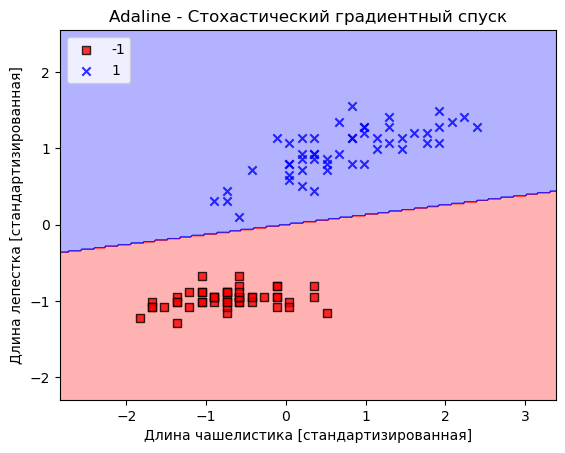

In [12]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=15, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state
        self.w_initialized = False
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            total_cost = 0
            for xi, target in zip(X, y):
                total_cost += self._update_weights(xi, target)
            average_cost = total_cost / len(y) 
            self.cost_.append(average_cost)
            print(f"Средняя ошибка за эпоху: {average_cost}")  
        return self

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = target - output
        self.w_[1:] += self.eta * xi * error
        self.w_[0] += self.eta * error
        return (error ** 2) / 2
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Стохастический градиентный спуск')
plt.xlabel('Длина чашелистика [стандартизированная]')
plt.ylabel('Длина лепестка [стандартизированная]')
plt.legend(loc='upper left')
plt.show()


Средняя ошибка за эпоху: 0.48770678664241013
Средняя ошибка за эпоху: 0.4736541365174149
Средняя ошибка за эпоху: 0.4600941574268995
Средняя ошибка за эпоху: 0.44700829570554246
Средняя ошибка за эпоху: 0.4343752517388762
Средняя ошибка за эпоху: 0.42218311666178854
Средняя ошибка за эпоху: 0.4104189855643897
Средняя ошибка за эпоху: 0.39906514778509206
Средняя ошибка за эпоху: 0.38810321521660457
Средняя ошибка за эпоху: 0.3775227730844001


C:\Users\semio\AppData\Local\Temp\ipykernel_4928\1692030902.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


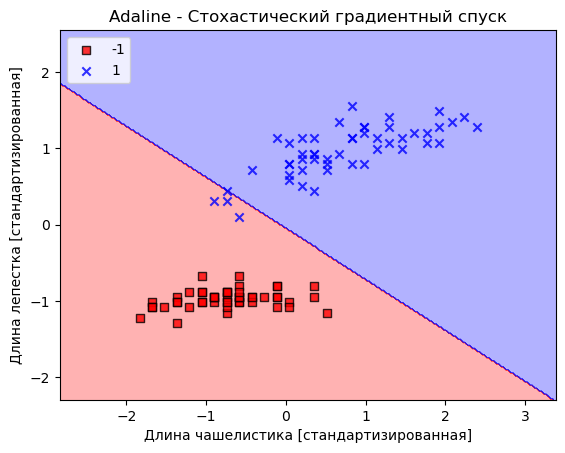

Средняя ошибка за эпоху: 0.48770678664241013
Средняя ошибка за эпоху: 0.4736541365174149
Средняя ошибка за эпоху: 0.4600941574268995
Средняя ошибка за эпоху: 0.44700829570554246
Средняя ошибка за эпоху: 0.4343752517388762
Средняя ошибка за эпоху: 0.42218311666178854
Средняя ошибка за эпоху: 0.4104189855643897
Средняя ошибка за эпоху: 0.39906514778509206
Средняя ошибка за эпоху: 0.38810321521660457
Средняя ошибка за эпоху: 0.3775227730844001
Средняя ошибка за эпоху: 0.3673117283766083
Средняя ошибка за эпоху: 0.3574572435803713
Средняя ошибка за эпоху: 0.3479462446086925
Средняя ошибка за эпоху: 0.33876195132604325
Средняя ошибка за эпоху: 0.32989531449110227
Средняя ошибка за эпоху: 0.3213356434806498
Средняя ошибка за эпоху: 0.3130722736446518
Средняя ошибка за эпоху: 0.3050957400811446
Средняя ошибка за эпоху: 0.2973956477736906
Средняя ошибка за эпоху: 0.289960618457841
Средняя ошибка за эпоху: 0.28277964283198903
Средняя ошибка за эпоху: 0.2758456758049301
Средняя ошибка за эпоху: 

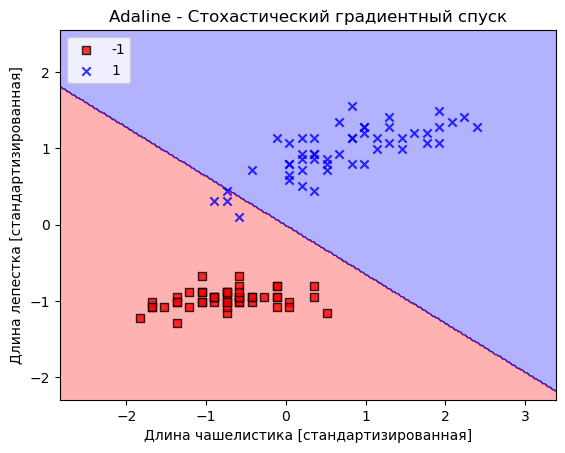

Средняя ошибка за эпоху: 0.48770678664241013
Средняя ошибка за эпоху: 0.4736541365174149
Средняя ошибка за эпоху: 0.4600941574268995
Средняя ошибка за эпоху: 0.44700829570554246
Средняя ошибка за эпоху: 0.4343752517388762
Средняя ошибка за эпоху: 0.42218311666178854
Средняя ошибка за эпоху: 0.4104189855643897
Средняя ошибка за эпоху: 0.39906514778509206
Средняя ошибка за эпоху: 0.38810321521660457
Средняя ошибка за эпоху: 0.3775227730844001
Средняя ошибка за эпоху: 0.3673117283766083
Средняя ошибка за эпоху: 0.3574572435803713
Средняя ошибка за эпоху: 0.3479462446086925
Средняя ошибка за эпоху: 0.33876195132604325
Средняя ошибка за эпоху: 0.32989531449110227
Средняя ошибка за эпоху: 0.3213356434806498
Средняя ошибка за эпоху: 0.3130722736446518
Средняя ошибка за эпоху: 0.3050957400811446
Средняя ошибка за эпоху: 0.2973956477736906
Средняя ошибка за эпоху: 0.289960618457841
Средняя ошибка за эпоху: 0.28277964283198903
Средняя ошибка за эпоху: 0.2758456758049301
Средняя ошибка за эпоху: 

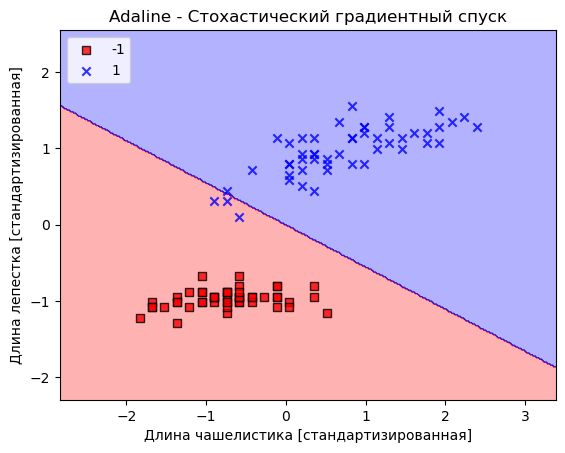

Средняя ошибка за эпоху: 0.1987001105512993
Средняя ошибка за эпоху: 0.07139750547740849
Средняя ошибка за эпоху: 0.054888440000673396
Средняя ошибка за эпоху: 0.04555856247835914
Средняя ошибка за эпоху: 0.03826249192340443
Средняя ошибка за эпоху: 0.034552383081273036
Средняя ошибка за эпоху: 0.031419756201701315
Средняя ошибка за эпоху: 0.029376819572171704
Средняя ошибка за эпоху: 0.027908456172567896
Средняя ошибка за эпоху: 0.02694892099574927


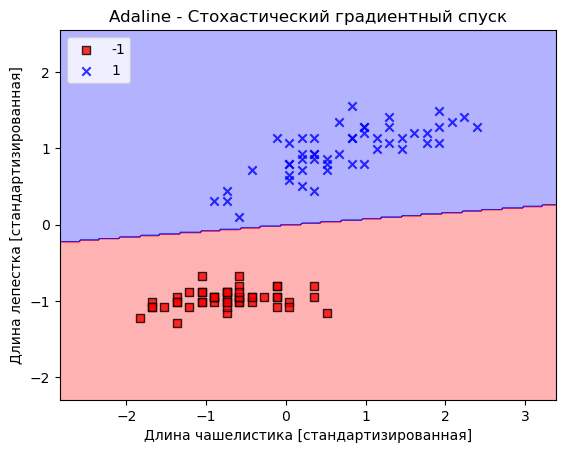

Средняя ошибка за эпоху: 0.1987001105512993
Средняя ошибка за эпоху: 0.07139750547740849
Средняя ошибка за эпоху: 0.054888440000673396
Средняя ошибка за эпоху: 0.04555856247835914
Средняя ошибка за эпоху: 0.03826249192340443
Средняя ошибка за эпоху: 0.034552383081273036
Средняя ошибка за эпоху: 0.031419756201701315
Средняя ошибка за эпоху: 0.029376819572171704
Средняя ошибка за эпоху: 0.027908456172567896
Средняя ошибка за эпоху: 0.02694892099574927
Средняя ошибка за эпоху: 0.026305124478771594
Средняя ошибка за эпоху: 0.025819491071229366
Средняя ошибка за эпоху: 0.0255707027249048
Средняя ошибка за эпоху: 0.025307644581654243
Средняя ошибка за эпоху: 0.025039767324673185
Средняя ошибка за эпоху: 0.02511771742317627
Средняя ошибка за эпоху: 0.025020234910549347
Средняя ошибка за эпоху: 0.02498927671775392
Средняя ошибка за эпоху: 0.02495172488310848
Средняя ошибка за эпоху: 0.024964927090458732
Средняя ошибка за эпоху: 0.024962371488960536
Средняя ошибка за эпоху: 0.02484704046580783


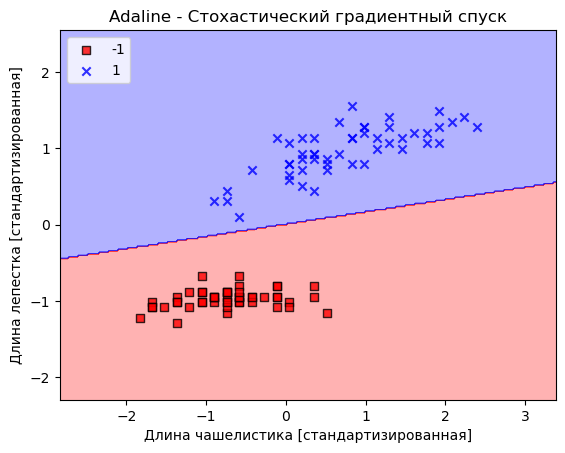

Средняя ошибка за эпоху: 0.1987001105512993
Средняя ошибка за эпоху: 0.07139750547740849
Средняя ошибка за эпоху: 0.054888440000673396
Средняя ошибка за эпоху: 0.04555856247835914
Средняя ошибка за эпоху: 0.03826249192340443
Средняя ошибка за эпоху: 0.034552383081273036
Средняя ошибка за эпоху: 0.031419756201701315
Средняя ошибка за эпоху: 0.029376819572171704
Средняя ошибка за эпоху: 0.027908456172567896
Средняя ошибка за эпоху: 0.02694892099574927
Средняя ошибка за эпоху: 0.026305124478771594
Средняя ошибка за эпоху: 0.025819491071229366
Средняя ошибка за эпоху: 0.0255707027249048
Средняя ошибка за эпоху: 0.025307644581654243
Средняя ошибка за эпоху: 0.025039767324673185
Средняя ошибка за эпоху: 0.02511771742317627
Средняя ошибка за эпоху: 0.025020234910549347
Средняя ошибка за эпоху: 0.02498927671775392
Средняя ошибка за эпоху: 0.02495172488310848
Средняя ошибка за эпоху: 0.024964927090458732
Средняя ошибка за эпоху: 0.024962371488960536
Средняя ошибка за эпоху: 0.02484704046580783


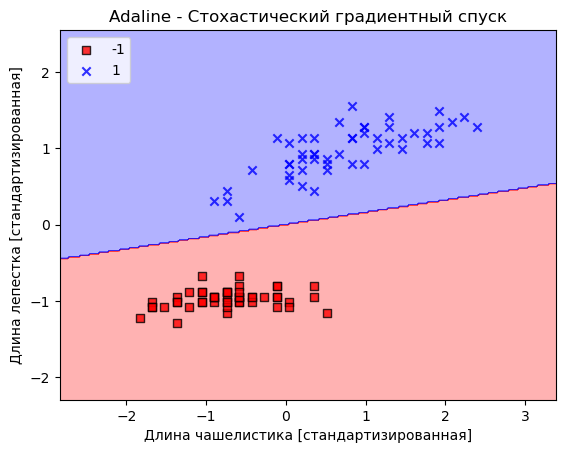

Средняя ошибка за эпоху: 0.062032593591058685
Средняя ошибка за эпоху: 0.03069358177226062
Средняя ошибка за эпоху: 0.02927539369280887
Средняя ошибка за эпоху: 0.029902902344819075
Средняя ошибка за эпоху: 0.02650860897033736
Средняя ошибка за эпоху: 0.028387393664076922
Средняя ошибка за эпоху: 0.0294411673175525
Средняя ошибка за эпоху: 0.028696546183747337
Средняя ошибка за эпоху: 0.029220158257705874
Средняя ошибка за эпоху: 0.02795548450958162


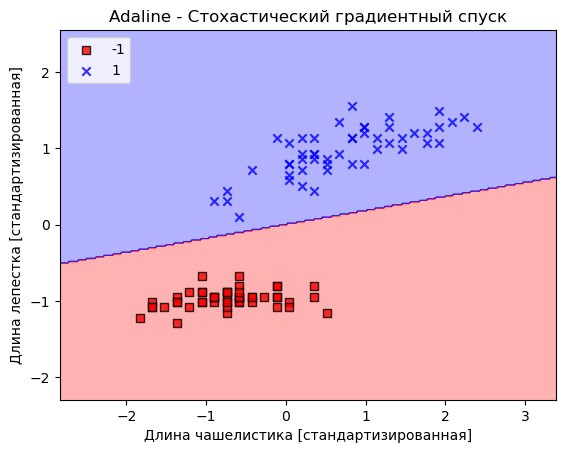

Средняя ошибка за эпоху: 0.062032593591058685
Средняя ошибка за эпоху: 0.03069358177226062
Средняя ошибка за эпоху: 0.02927539369280887
Средняя ошибка за эпоху: 0.029902902344819075
Средняя ошибка за эпоху: 0.02650860897033736
Средняя ошибка за эпоху: 0.028387393664076922
Средняя ошибка за эпоху: 0.0294411673175525
Средняя ошибка за эпоху: 0.028696546183747337
Средняя ошибка за эпоху: 0.029220158257705874
Средняя ошибка за эпоху: 0.02795548450958162
Средняя ошибка за эпоху: 0.028179382064032227
Средняя ошибка за эпоху: 0.028258785053196234
Средняя ошибка за эпоху: 0.02870319790918636
Средняя ошибка за эпоху: 0.02824009343372925
Средняя ошибка за эпоху: 0.02835075175554821
Средняя ошибка за эпоху: 0.028579979502007608
Средняя ошибка за эпоху: 0.02923467064008884
Средняя ошибка за эпоху: 0.029056674374303662
Средняя ошибка за эпоху: 0.029380769281281638
Средняя ошибка за эпоху: 0.02889989230009626
Средняя ошибка за эпоху: 0.02942204778919391
Средняя ошибка за эпоху: 0.02775645078467689
С

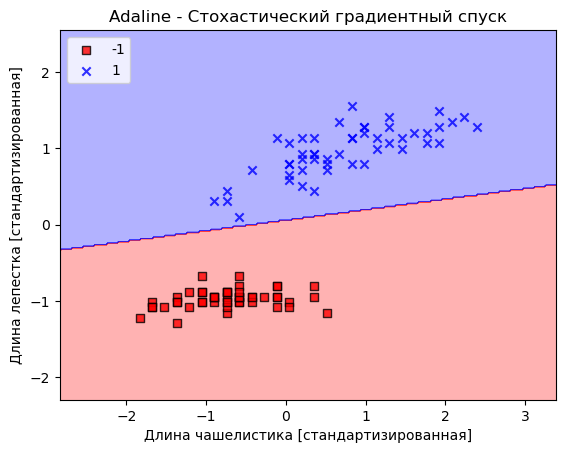

Средняя ошибка за эпоху: 0.062032593591058685
Средняя ошибка за эпоху: 0.03069358177226062
Средняя ошибка за эпоху: 0.02927539369280887
Средняя ошибка за эпоху: 0.029902902344819075
Средняя ошибка за эпоху: 0.02650860897033736
Средняя ошибка за эпоху: 0.028387393664076922
Средняя ошибка за эпоху: 0.0294411673175525
Средняя ошибка за эпоху: 0.028696546183747337
Средняя ошибка за эпоху: 0.029220158257705874
Средняя ошибка за эпоху: 0.02795548450958162
Средняя ошибка за эпоху: 0.028179382064032227
Средняя ошибка за эпоху: 0.028258785053196234
Средняя ошибка за эпоху: 0.02870319790918636
Средняя ошибка за эпоху: 0.02824009343372925
Средняя ошибка за эпоху: 0.02835075175554821
Средняя ошибка за эпоху: 0.028579979502007608
Средняя ошибка за эпоху: 0.02923467064008884
Средняя ошибка за эпоху: 0.029056674374303662
Средняя ошибка за эпоху: 0.029380769281281638
Средняя ошибка за эпоху: 0.02889989230009626
Средняя ошибка за эпоху: 0.02942204778919391
Средняя ошибка за эпоху: 0.02775645078467689
С

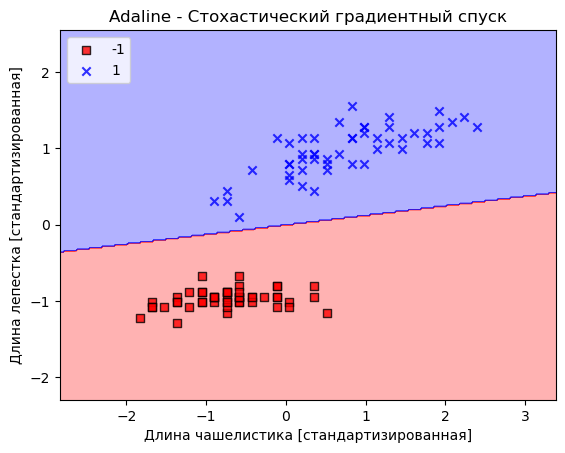

In [15]:
for learning_rate in [0.0001, 0.01, 0.1]:
    for era in [10, 50, 100]:
        ada_sgd = AdalineSGD(n_iter=era, eta=learning_rate, random_state=42)
        ada_sgd.fit(X_std, y)
        plot_decision_regions(X_std, y, classifier=ada_sgd)
        plt.title('Adaline - Стохастический градиентный спуск')
        plt.xlabel('Длина чашелистика [стандартизированная]')
        plt.ylabel('Длина лепестка [стандартизированная]')
        plt.legend(loc='upper left')
        plt.show()  